In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('C:/Users/Dell/PycharmProjects/AQIndex/Data/Real-Data/real_comb.csv')

In [6]:
df.head()

,T,TM,Tm,H,W,V,VM,PM2.5
0,23.4,30.3,19.0,59.0,6.3,4.3,5.4,284.795833
1,22.4,30.3,16.9,57.0,6.9,3.3,7.6,219.720833
2,24.0,31.8,16.9,51.0,6.9,2.8,5.4,182.187500
3,22.8,30.2,17.6,55.0,7.7,3.7,7.6,154.037500
4,23.1,30.6,17.4,46.0,6.9,3.3,5.4,223.208333


In [7]:
#Check for null 
df.isnull().sum()

T        0
TM       0
Tm       0
H        0
W        0
V        0
VM       0
PM2.5    1
dtype: int64

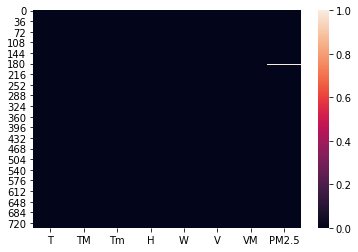

In [8]:
sns.heatmap(df.isnull())
# Grapgh impies one null value that we need to handle

In [9]:
df[df['PM2.5']== 'NaN']

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,T,TM,Tm,H,W,V,VM,PM2.5


In [10]:
df.dropna(inplace= True)

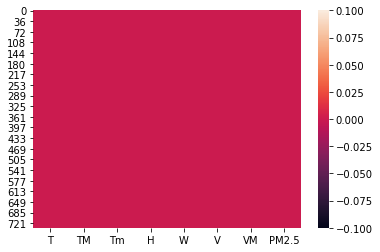

In [11]:
sns.heatmap(df.isnull())

In [12]:
x= df.iloc[:,:-1]
y=df.iloc[:, -1]

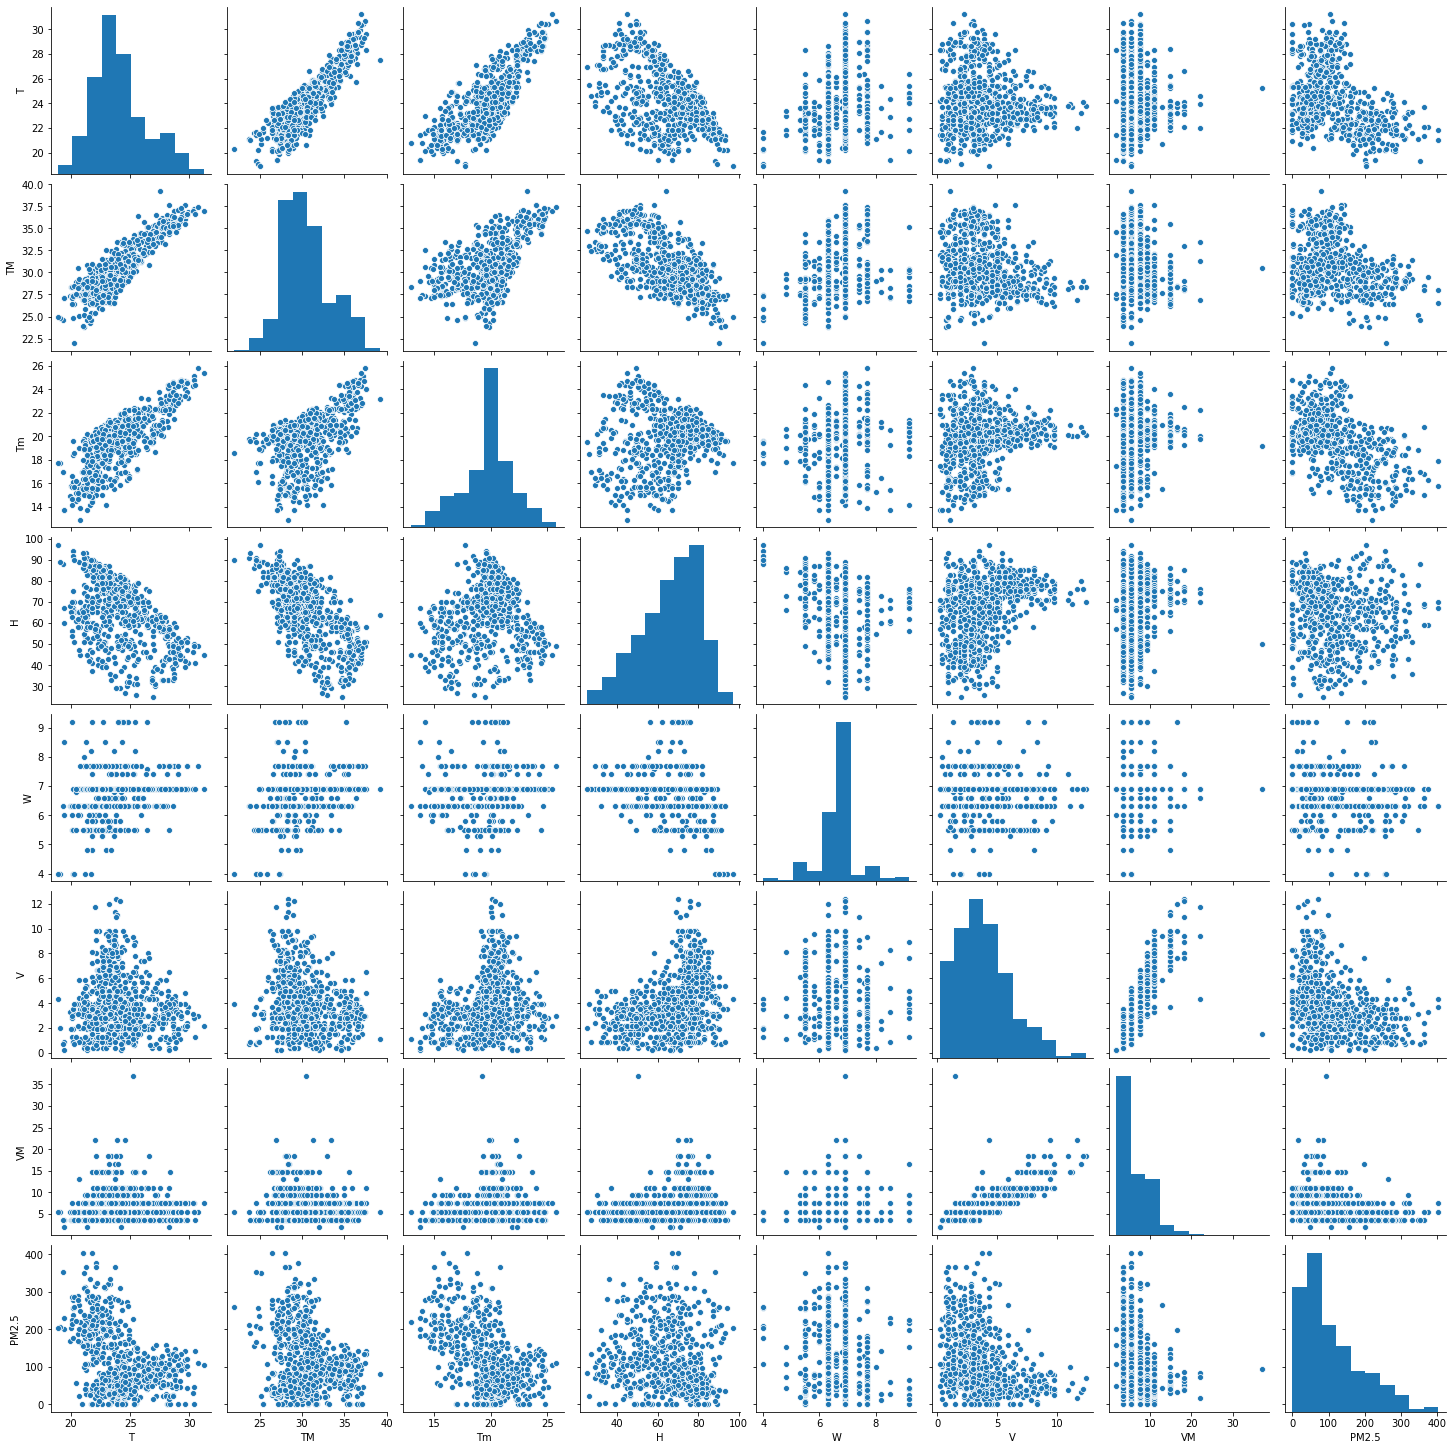

In [13]:
#Now check correlation: 
#1. first see the variation of dependent wrt independent,This can give vague idea on high level the dependent is varying 
#linearly or any other pattern.
#2. Second: Also gives the idea on how different independent variables are correlated. Likde if any two independent
#variables are highly correlated, We can remove one independent feature
sns.pairplot(df) 

In [14]:
df.corr()

,T,TM,Tm,H,W,V,VM,PM2.5
T,1.000000,0.882433,0.772471,-0.479727,0.298138,-0.060587,-0.022747,-0.370754
TM,0.882433,1.000000,0.512705,-0.659010,0.275448,-0.233228,-0.160021,-0.194339
Tm,0.772471,0.512705,1.000000,0.101630,0.102964,0.217269,0.196513,-0.519450
H,-0.479727,-0.659010,0.101630,1.000000,-0.282130,0.380803,0.299179,-0.189129
W,0.298138,0.275448,0.102964,-0.282130,1.000000,0.020445,0.007957,-0.138311
V,-0.060587,-0.233228,0.217269,0.380803,0.020445,1.000000,0.792492,-0.402463
VM,-0.022747,-0.160021,0.196513,0.299179,0.007957,0.792492,1.000000,-0.339834
PM2.5,-0.370754,-0.194339,-0.519450,-0.189129,-0.138311,-0.402463,-0.339834,1.000000


In [15]:
#correlation with heatmap

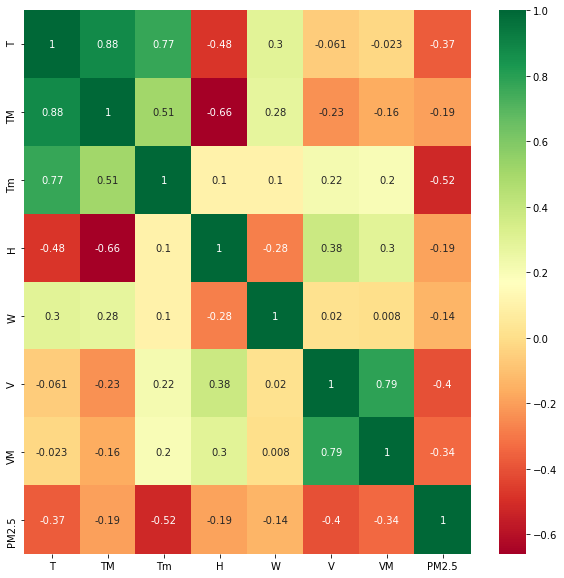

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True, cmap='RdYlGn')

In [17]:
#Feature Importance using ExtratreesRegressor
from sklearn.ensemble import ExtraTreesRegressor 
model= ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [18]:
print(model.feature_importances_)

[0.19998209 0.12076223 0.25737456 0.11310083 0.07226003 0.16490295
 0.07161731]


In [19]:
feat_imp=pd.Series(model.feature_importances_, index=x.columns)

In [20]:
feat_imp

T     0.199982
TM    0.120762
Tm    0.257375
H     0.113101
W     0.072260
V     0.164903
VM    0.071617
dtype: float64

In [21]:
feat_imp.nlargest(3)

Tm    0.257375
T     0.199982
V     0.164903
dtype: float64

(array([2., 0., 2., 0., 0., 1., 1., 0., 0., 1.]),
 array([0.07161731, 0.09019303, 0.10876876, 0.12734448, 0.14592021,
        0.16449593, 0.18307166, 0.20164738, 0.22022311, 0.23879883,
        0.25737456]),
 <a list of 10 Patch objects>)

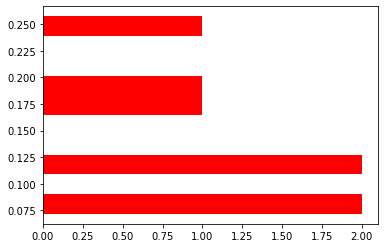

In [22]:
plt.hist(feat_imp, color='red', orientation='horizontal')

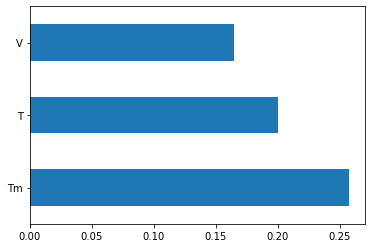

In [23]:
feat_imp.nlargest(3).plot(kind='barh')

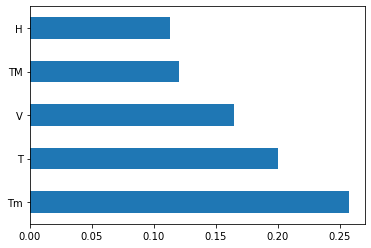

In [24]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

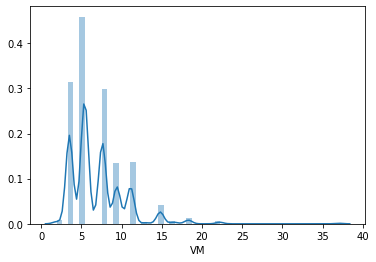

In [25]:
# Apply Linear regression
#####Before that checking how are data distributed Normal or skewed
#T: Mean 24- data is right skewed
#TM. Mean 30- data is right skewed
#Tm Mean=19.73, Almost normally distributed
#H Mean= 65.81, Left Skewed
#W Mean= 6.67- Normally distributed
#V- mean= 3.8 Right Skewed
#VM -Mean= 6.93 Very much right skewed
sns.distplot(x.iloc[:,6])

In [26]:
x.iloc[:,6].mean()

6.934375000000023

In [27]:
#Train test Split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=1)

In [28]:
y_train.shape

(515,)

In [29]:
l=[x_train.size,x_test.size,y_train.size,y_test.size]
l

[3605, 1547, 515, 221]

In [30]:
x_train.size/(x_train.size+x_test.size)

0.6997282608695652

In [31]:
y_train.size/(y_train.size+y_test.size)

0.6997282608695652

In [32]:
#Fitting the model
from sklearn.linear_model import LinearRegression

In [33]:
reg=LinearRegression()

In [34]:
reg.fit(x_train,y_train)

LinearRegression()

In [35]:
reg.score(x_train,y_train)

0.4047826710038279

In [36]:
reg.score(x_test,y_test)

0.3551271475036889

In [45]:
#y=m1x1+m2x2+m3x3+m4x4+......+c
# coefficient= m1,m2,m3,m4.....
# intercept= c
reg.coef_

array([-20.22138559,   0.29729262,  -0.24941587,  -1.98664692,
        -2.13667262, -10.38685033,   0.03436043])

In [154]:
reg.intercept_

773.1447813115984

In [46]:
# checking of R squared on train data usign score method
reg.score(x_train,y_train)

0.4047826710038279

In [47]:
# checking of R squared on test data usign score method
reg.score(x_test,y_test)

0.3551271475036889

In [48]:
##Cross Validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(reg,x,y)
score

array([0.00847933, 0.10140929, 0.32839567, 0.47346049, 0.41433243])

In [49]:
score.mean()

0.26521544136260417

In [50]:
prediction= reg.predict(x_test)

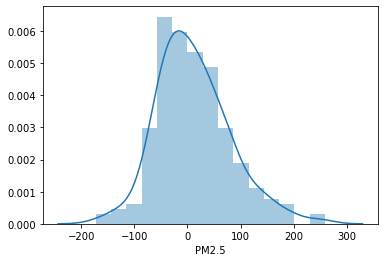

In [51]:
sns.distplot(y_test-prediction)

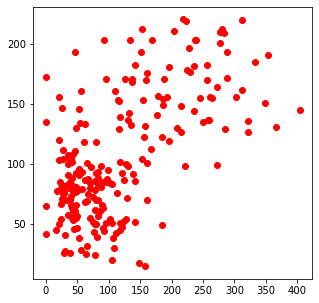

In [56]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,prediction, color=['red'])

In [59]:
from sklearn import metrics

In [60]:
print("MAE", metrics.mean_absolute_error(y_test, prediction))

MAE 53.65089660844715


In [61]:
print("MSE", metrics.mean_squared_error(y_test,prediction))

MSE 4955.699878232973


In [64]:
import numpy as np

In [65]:
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test,prediction)))

RMSE 70.39673201387244


In [66]:
import pickle


In [68]:
#open file where we want to sotre the model file
file= open('C:/Users/Dell/PycharmProjects/AQIndex/Models/regression_model.pkl', 'wb')

# Dump information to that file
pickle.dump(reg, file)

